In [2]:
import pypsa
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

In [5]:
n = pypsa.Network("networks/elec_s_6_ec_lcopt_Co2L-24H.nc")

c:\Users\marih\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\marih\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\marih\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly ca

(<matplotlib.collections.PatchCollection at 0x299637607c0>,
 <matplotlib.collections.LineCollection at 0x29963988430>)

c:\Users\marih\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\marih\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\marih\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


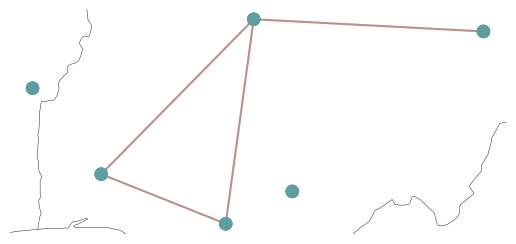

In [6]:
n.plot()

In [8]:
for c in n.iterate_components(list(n.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name, len(c.df)))

Component 'Bus' has 18 entries
Component 'Carrier' has 17 entries
Component 'GlobalConstraint' has 1 entries
Component 'Line' has 4 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 24 entries
Component 'Load' has 6 entries
Component 'Generator' has 26 entries
Component 'StorageUnit' has 2 entries
Component 'Store' has 12 entries


In [10]:
#Temporal resolution

n.snapshots[:10]
len(n.snapshots[:10])

6

In [11]:
#Static component data

n.lines.head()

,bus0,bus1,length,num_parallel,carrier,type,s_max_pu,s_nom,capital_cost,s_nom_extendable,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
1,NG1 0,NG1 1,602.406419,2.368421,AC,Al/St 240/40 4-bundle 380.0,0.7,4021.821975,24780.654839,True,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NG1 0,NG1 2,388.614230,1.776316,AC,Al/St 240/40 4-bundle 380.0,0.7,3016.366481,15986.076496,True,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NG1 1,NG1 2,630.416910,1.776316,AC,Al/St 240/40 4-bundle 380.0,0.7,3016.366481,25932.897366,True,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NG1 1,NG1 3,659.996456,0.881579,AC,Al/St 240/40 4-bundle 380.0,0.7,1497.011513,27149.684753,True,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
n.generators.head()

,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,p_nom_extendable,carrier,bus,...,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
BJ0 0 onwind,1.575847e+05,11091.383600,0.000000,96085.888020,1.00,0.000000,0.015000,True,onwind,BJ0 0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
BJ0 0 solar,1.850860e+05,30580.190887,2.378612,35602.071244,1.00,2.378612,0.010000,True,solar,BJ0 0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
NG1 0 CCGT,inf,0.000000,10331.305998,99027.729293,0.58,10331.305998,38.855172,False,CCGT,NG1 0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
NG1 0 coal,inf,0.000000,4218.500000,349976.553630,0.33,4218.500000,28.196970,False,coal,NG1 0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
NG1 0 offwind-ac,3.362238e+04,2827.806209,0.000000,195404.232224,1.00,0.000000,0.015000,True,offwind-ac,NG1 0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0


In [13]:
n.storage_units.head()


,bus,efficiency_store,p_min_pu,efficiency_dispatch,cyclic_state_of_charge,p_nom,carrier,max_hours,control,type,...,capital_cost,build_year,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
NG1 1 hydro,NG1 1,0.0,0.0,0.9,True,1300.0,hydro,2282.031842,PQ,,...,0.0,0,inf,0.0,False,NaN,True,0.0,0.0,0.0
NG1 2 hydro,NG1 2,0.0,0.0,0.9,True,1338.0,hydro,2282.031842,PQ,,...,0.0,0,inf,0.0,False,NaN,True,0.0,0.0,0.0


In [14]:
n.loads.head()

,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
BJ0 0,BJ0 0,,,0.0,0.0,-1.0
NG1 0,NG1 0,,,0.0,0.0,-1.0
NG1 1,NG1 1,,,0.0,0.0,-1.0
NG1 2,NG1 2,,,0.0,0.0,-1.0
NG1 3,NG1 3,,,0.0,0.0,-1.0


Time-varying component data


<AxesSubplot:xlabel='snapshot'>

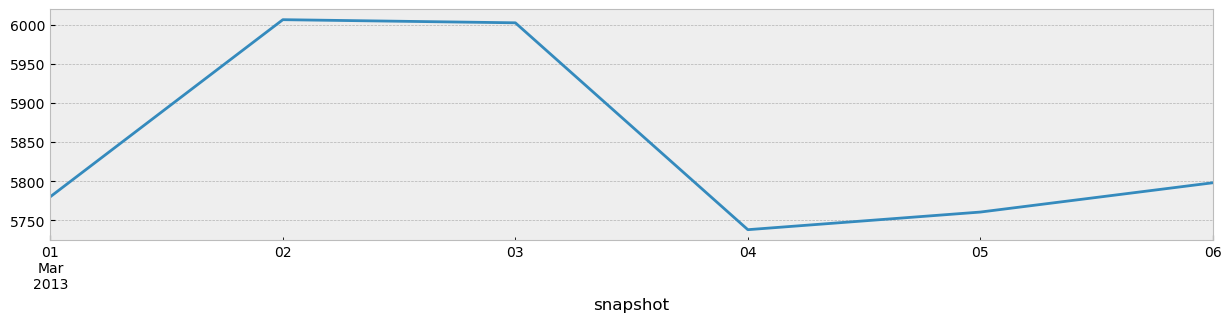

In [17]:
n.loads_t.p_set.sum(axis=1).plot(figsize=(15,3))

<AxesSubplot:xlabel='snapshot'>

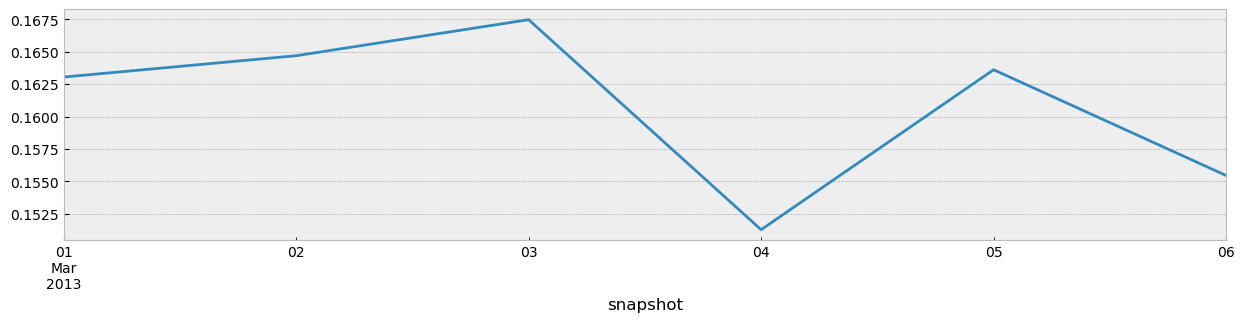

In [21]:
n.generators_t.p_max_pu.loc["2013-03", "NG1 0 solar"].plot(figsize=(15,3))

In [23]:
(n.lines.s_nom_opt - n.lines.s_nom).head(5)

Line
1   -4021.821975
2   -3016.366481
3   -3016.366481
4   -1497.011513
dtype: float64

In [24]:
n.generators.groupby("carrier").p_nom_opt.sum() / 1e3 #GW

carrier
CCGT          0.0
coal          0.0
offwind-ac    0.0
offwind-dc    0.0
oil           0.0
onwind        0.0
solar         0.0
Name: p_nom_opt, dtype: float64

In [25]:
n.storage_units.groupby("carrier").p_nom_opt.sum() / 1e3 #GW

carrier
hydro    0.0
Name: p_nom_opt, dtype: float64

<AxesSubplot:xlabel='snapshot'>

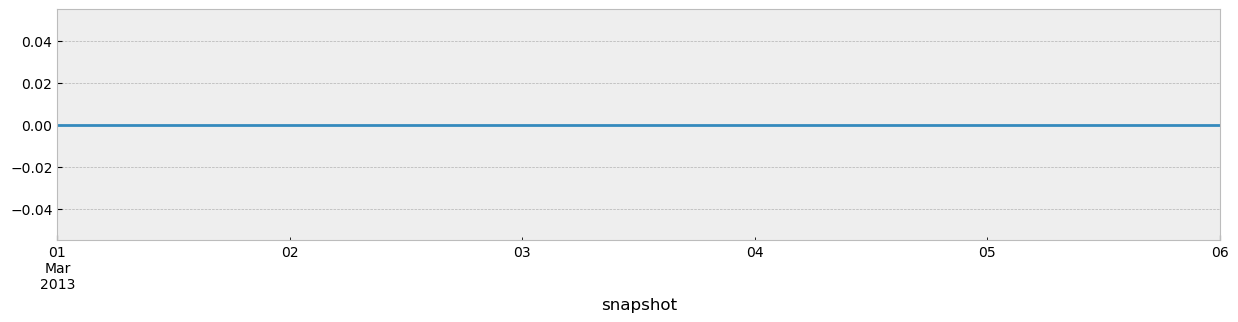

In [26]:
#Energy storage

(n.storage_units_t.state_of_charge.sum(axis=1).resample("D").mean() / 1e6).plot(figsize=(15,3)) #TWh

In [27]:
(n.storage_units_t.state_of_charge["2013-07"].filter(like="battery", axis=1).sum(axis=1) / 1e6).plot(figsize=(15,3)) #TWh